In [1]:
#default_exp test

In [2]:
#export
from fastcore.imports import *

In [3]:
from nbdev.showdoc import *
from PIL import Image #only needed for tests

# Test

> Helper functions to quickly write tests in notebooks

## Simple test functions

We can check that code raises an exception when that's expected (`test_fail`). To test for equality or inequality (with different types of things) we define a simple function `test` that compares two object with a given `cmp` operator.

Tendo: `test_fail` is used to ensure that a test fails with a message in the `msg` arg or the arg `contains` is contained in the exception the failing test(`test_fail`) returns

In [4]:
#export
def test_fail(f, msg='', contains=''):
    "Fails with `msg` unless `f()` raises an exception and (optionally) has `contains` in `e.args`"
    try: f() # run the func
    except Exception as e: # if an Exception from f()
        assert not contains or contains in str(e) #check if the Exception contains `contains`
        return
    assert False,f"Expected exception but none raised. {msg}" # if it doesn't raise an 2 Exceptions

In [5]:
assert False

AssertionError: 

In [6]:
def _fail(): raise Exception("foobar")
# def _fail(): pass # this removes the exception from the f() which should lead to a test fail
test_fail(_fail, contains="foo")
# test_fail(_fail, msg='Hello there', contains="foo") #run this to fail the f() returns an Exception Test

def _fail(): raise Exception()
test_fail(_fail) # no exception text is raised from the func

Tendo: Test to see if a condition `cmp` with a name `cname` applies on a and b

In [7]:
#export
def test(a, b, cmp,cname=None):
    "`assert` that `cmp(a,b)`; display inputs and `cname or cmp.__name__` if it fails"
    if cname is None: cname=cmp.__name__ #get the name of the test being checked
    assert cmp(a,b),f"{cname}:\n{a}\n{b}" # if the check fails raise an Assertion exception in the form shown

In [8]:
# run to show example
operator.eq([1,2],[1,2]), operator.eq.__name__

(True, 'eq')

In [9]:
# run to show example
# x = lambda: test([1,2],[1], operator.eq)
# x()

In [10]:
test([1,2],[1,2], operator.eq) # check for equality
test_fail(lambda: test([1,2],[1], operator.eq)) #the test is run as `f()` in `test_fail`
test([1,2],[1],   operator.ne) #check for non-equality
test_fail(lambda: test([1,2],[1,2], operator.ne)) 

`show_doc` is from project `nbdev`. It can be used to see the documentation of any python object

In [11]:
show_doc(all_equal)

<h4 id="all_equal" class="doc_header"><code>all_equal</code><a href="https://github.com/fastai/fastcore/tree/master/fastcore/imports.py#L47" class="source_link" style="float:right">[source]</a></h4>

> <code>all_equal</code>(**`a`**, **`b`**)

Compares whether `a` and `b` are the same length and have the same contents

In [12]:
all_equal(['abc'], ['abc'])

True

In [13]:
test(['abc'], ['abc'],  all_equal) #tests to make sure all the items in both lists are equal

In [14]:
operator.ne([1,2],[4,4])dd

SyntaxError: invalid syntax (<ipython-input-14-347818415fdf>, line 1)

In [15]:
show_doc(equals)

<h4 id="equals" class="doc_header"><code>equals</code><a href="https://github.com/fastai/fastcore/tree/master/fastcore/imports.py#L62" class="source_link" style="float:right">[source]</a></h4>

> <code>equals</code>(**`a`**, **`b`**)

Compares `a` and `b` for equality; supports sublists, tensors and arrays too

In [16]:
test([['abc'],['a']], [['abc'],['a']],  equals)

In [17]:
#export
def nequals(a,b):
    "Compares `a` and `b` for `not equals`"
    return not equals(a,b)

In [18]:
test(['abc'], ['ab' ], nequals)

## test_eq test_ne, etc...

Just use `test_eq`/`test_ne` to test for `==`/`!=`. `test_eq_type` check things are equals and of the same type. We define them using `test`:

`test_eq` is the same as `==` and `test_ne` is the same as `!=`

In [19]:
#export
def test_eq(a,b):
    "`test` that `a==b`"
    test(a,b,equals, '==') #note the use of the equality sign as our cmp this time. `equals` is a method from python

In [20]:
test_eq([1,2],[1,2])
test_eq([1,2],map(int,[1,2]))
test_eq([1,2],map(float,[1,2])) #added by tendo
test_eq(array([1,2]),array([1,2]))
test_eq(array([1,2]),array([1,2]))
test_eq([array([1,2]),3],[array([1,2]),3])
test_eq(dict(a=1,b=2), dict(b=2,a=1))
test_fail(lambda: test_eq([1,2], 1), contains="==") # the test fails because the args to `test_eq` are different
test_eq({'a', 'b', 'c'}, {'c', 'a', 'b'}) # the equality test passes even when the order is changed

In [21]:
#hide
import pandas as pd

In [22]:
# the equality test even work for dataframes!

df1 = pd.DataFrame(dict(a=[1,2],b=['a','b']))
df2 = pd.DataFrame(dict(a=[1,2],b=['a','b']))

test_eq(df1,df2)
test_eq(df1.a,df2.a)
class T(pd.Series): pass
test_eq(df1.iloc[0], T(df2.iloc[0]))

In [23]:
df1.iloc[0]

a    1
b    a
Name: 0, dtype: object

In [24]:
(df2.iloc[0])

a    1
b    a
Name: 0, dtype: object

In order to test that two args are equal and of the same type, we use `test_eq_type`

In [25]:
#export
def test_eq_type(a,b):
    "`test` that `a==b` and are same type"
    test_eq(a,b)
    test_eq(type(a),type(b)) #make sure the types match
    if isinstance(a,(list,tuple)): test_eq(map(type,a),map(type,b)) #if the input arg is a collection map the type over and check for match

In [26]:
test_eq_type(1,1)
test_fail(lambda: test_eq_type(1,1.)) # int and float
test_eq_type([1,1],[1,1])
test_fail(lambda: test_eq_type([1,1],(1,1)))
test_fail(lambda: test_eq_type([1,1],[1,1.]))

In [27]:
#export
def test_ne(a,b):
    "`test` that `a!=b`"
    test(a,b,nequals,'!=') #`nequals` is a method from python

In [28]:
test_ne([1,2],[1])
test_ne([1,2],[1,3])
test_ne(array([1,2]),array([1,1]))
test_ne(array([1,2]),array([1,1]))
test_ne([array([1,2]),3],[array([1,2])])
test_ne([3,4],array([3]))
test_ne([3,4],array([3,5]))
test_ne(dict(a=1,b=2), ['a', 'b'])
test_ne(['a', 'b'], dict(a=1,b=2))

Inorder to check if two args `a` and `b` are close to each other with a distance of +- `eps`, we use the `is_close`. This is extended to work in `test_close` test

In [29]:
#export
def is_close(a,b,eps=1e-5):
    "Is `a` within `eps` of `b`"
    if hasattr(a, '__array__') or hasattr(b,'__array__'): #if input is ndarray
        return (abs(a-b)<eps).all()
    if isinstance(a, (Iterable,Generator)) or isinstance(b, (Iterable,Generator)): # if input is collection
        return is_close(np.array(a), np.array(b), eps=eps) #convert to collection to array and continue
    return abs(a-b)<eps

In [30]:
#export
def test_close(a,b,eps=1e-5):
    "`test` that `a` is within `eps` of `b`"
    test(a,b,partial(is_close,eps=eps),'close') # the error message if test fails will be 'close'

In [31]:
test_close(1,1.001,eps=1e-2)
test_fail(lambda: test_close(1,1.001))
test_close([-0.001,1.001], [0.,1.], eps=1e-2)
test_close(np.array([-0.001,1.001]), np.array([0.,1.]), eps=1e-2)
test_close(array([-0.001,1.001]), array([0.,1.]), eps=1e-2)

In [32]:
#export
def test_is(a,b):
    "`test` that `a is b`"
    test(a,b,operator.is_, 'is')

In [33]:
operator.is_([1], [1]) #two lists are actually different objects in memory so they are not the same

False

In [34]:
test_fail(lambda: test_is([1], [1]))
a = [1]
test_is(a, a)

You have twi identical lists with the exact same items but different order. Use `test_shuffled` to know if they are shuffled twins

In [35]:
#export
def test_shuffled(a,b):
    "`test` that `a` and `b` are shuffled versions of the same sequence of items"
    test_ne(a, b) # first make sure the two args are not the same
    test_eq(Counter(a), Counter(b)) # count each element in both lists in order to be sure they match

In [36]:
a = list(range(50))
b = copy(a)
random.shuffle(b)
test_shuffled(a,b)
test_fail(lambda:test_shuffled(a,a))

In [37]:
a = 'abc'
b = 'abcabc'
test_fail(lambda:test_shuffled(a,b)) # the args must be identical list but shuffed

In [38]:
a = ['a', 42, True] 
b = [42, True, 'a']
test_shuffled(a,b)

use the `test_stdout` to ensure that the output gotten from the function call is what you expect

In [39]:
io.StringIO().getvalue()

''

In [40]:
#export
def test_stdout(f, exp, regex=False):
    "Test that `f` prints `exp` to stdout, optionally checking as `regex`"
    s = io.StringIO()
    with redirect_stdout(s): f()
    if regex: assert re.search(exp, s.getvalue()) is not None
    else: test_eq(s.getvalue(), f'{exp}\n' if len(exp) > 0 else '')

In [41]:
test_stdout(lambda: print('hi'), 'hi')
test_fail(lambda: test_stdout(lambda: print('hi'), 'ho'))
test_stdout(lambda: 1+1, '')
test_stdout(lambda: print('hi there!'), r'^hi.*!$', regex=True)

In [42]:
#export
def test_warns(f, show=False):
    with warnings.catch_warnings(record=True) as w:
        f()
        test_ne(len(w), 0)
        if show:
            for e in w: print(f"{e.category}: {e.message}")

In [43]:
test_warns(lambda: warnings.warn("Oh no!"), {})
test_fail(lambda: test_warns(lambda: 2+2))

In [44]:
test_warns(lambda: warnings.warn("Oh no!"), show=True)

<class 'UserWarning'>: Oh no!


In [45]:
#export
TEST_IMAGE = 'images/puppy.jpg'

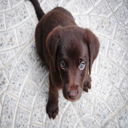

In [46]:
im = Image.open(TEST_IMAGE).resize((128,128)); im

In [47]:
#export
TEST_IMAGE_BW = 'images/mnist3.png'

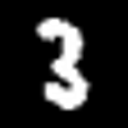

In [48]:
im = Image.open(TEST_IMAGE_BW).resize((128,128)); im

In [49]:
#export
def test_fig_exists(ax):
    "Test there is a figure displayed in `ax`"
    assert ax and len(np.frombuffer(ax.figure.canvas.tostring_argb(), dtype=np.uint8))

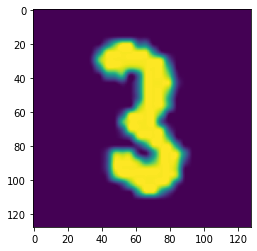

In [50]:
fig,ax = plt.subplots()
ax.imshow(array(im));

In [51]:
test_fig_exists(ax)

In [52]:
#hide
from nbdev.export import notebook2script
# notebook2script()